In [1]:
!pip install seaborn

     |████████████████████████████████| 285 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 8.7 MB/s eta 0:00:01


In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


In [4]:
path_csv = "data/mnist_784_csv.csv"

In [5]:
df = pd.read_csv(path_csv)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: int64(785)
memory usage: 419.2 MB


In [7]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [8]:
df['pixel255'].describe()

count    70000.000000
mean         0.509186
std          9.734744
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        255.000000
Name: pixel255, dtype: float64

In [9]:
corrMatrix = df.corr()
print (corrMatrix)

          pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
pixel1       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
pixel2       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
pixel3       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
pixel4       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
pixel5       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...          ...     ...     ...     ...     ...     ...     ...     ...   
pixel781     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
pixel782     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
pixel783     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
pixel784     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
class        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

          pixel9  pixel10  ...  pixel776  pixel777  pixel778  pixel779  \
pixel1       

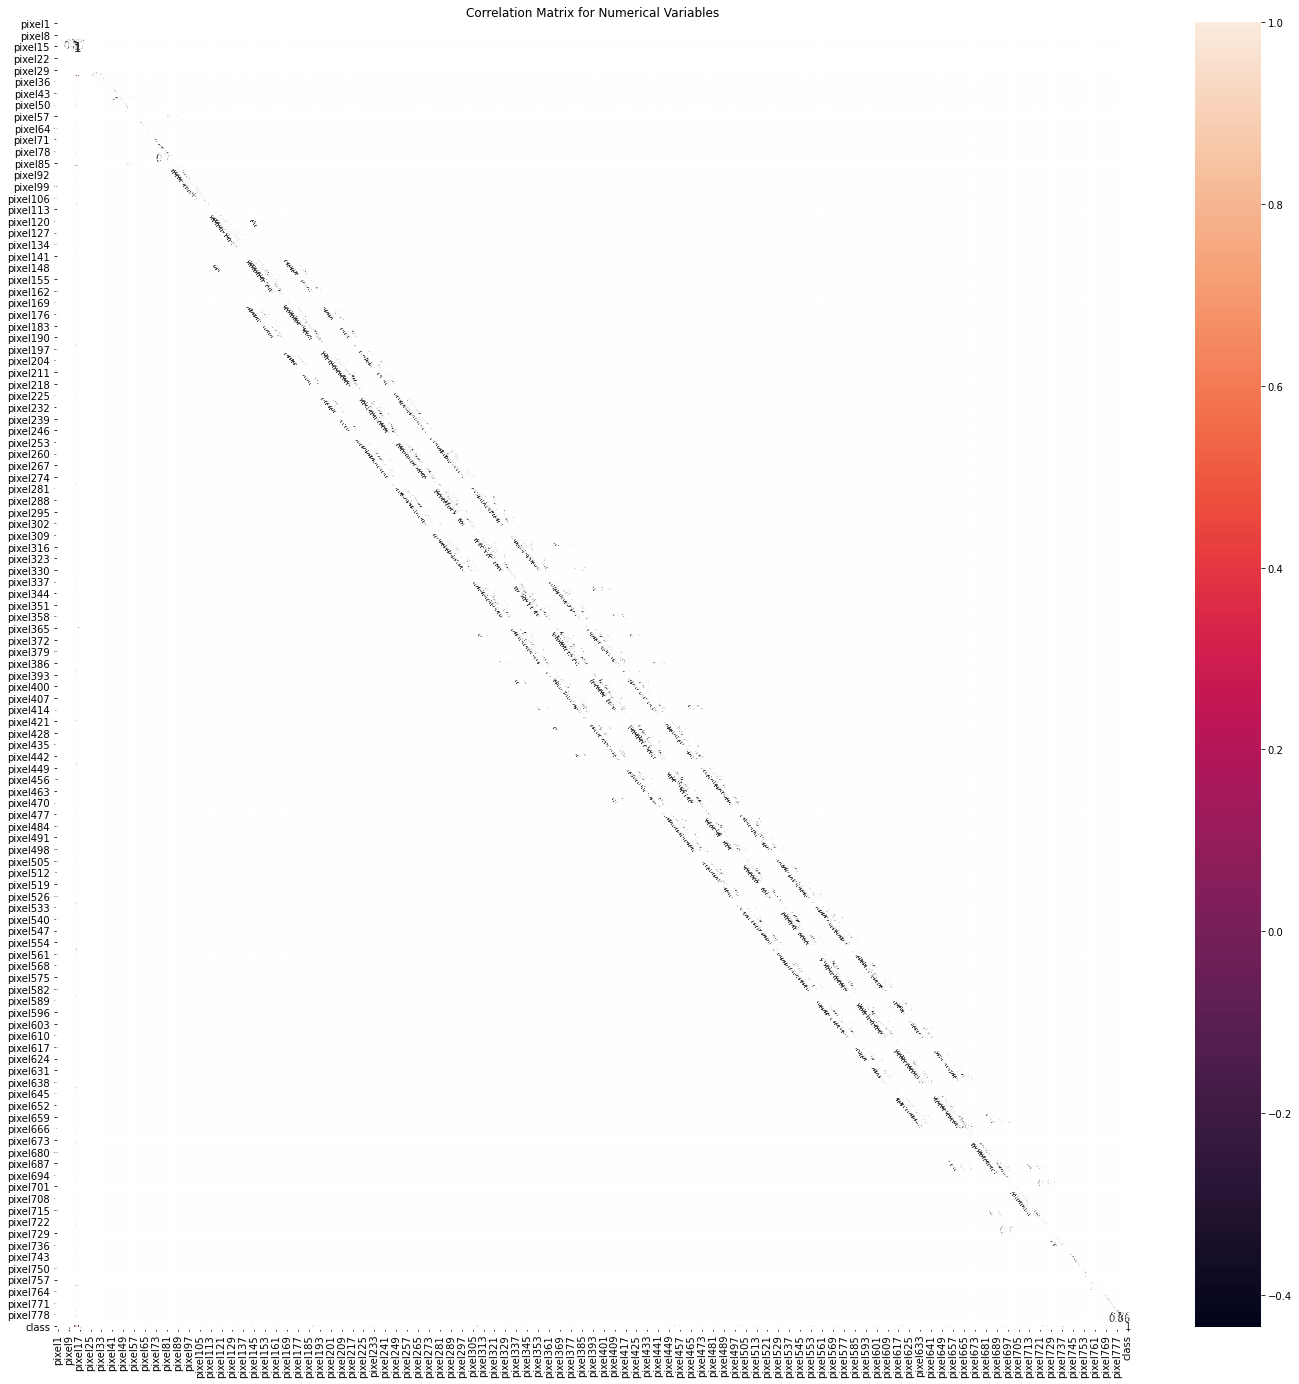

In [10]:
plt.figure(figsize=(24,24))  # set plot size (denoted in inches)
sn.heatmap(corrMatrix, annot=True)
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

In [11]:
corr_pairs = corrMatrix.unstack()
print(corr_pairs)

pixel1  pixel1      NaN
        pixel2      NaN
        pixel3      NaN
        pixel4      NaN
        pixel5      NaN
                   ... 
class   pixel781    NaN
        pixel782    NaN
        pixel783    NaN
        pixel784    NaN
        class       1.0
Length: 616225, dtype: float64


In [12]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

pixel546  pixel633   -0.435237
pixel633  pixel546   -0.435237
pixel546  pixel632   -0.433500
pixel632  pixel546   -0.433500
pixel547  pixel633   -0.430997
                        ...   
class     pixel760         NaN
          pixel781         NaN
          pixel782         NaN
          pixel783         NaN
          pixel784         NaN
Length: 616225, dtype: float64


In [13]:
relaciones_fuertes_pairs = sorted_pairs[(sorted_pairs > 0.7) & (sorted_pairs < 1.0)]

print(relaciones_fuertes_pairs)

pixel356  pixel329    0.700250
pixel329  pixel356    0.700250
pixel622  pixel593    0.700744
pixel593  pixel622    0.700744
pixel605  pixel632    0.701262
                        ...   
pixel393  pixel421    0.982570
pixel727  pixel699    0.983547
pixel699  pixel727    0.983547
pixel589  pixel617    1.000000
pixel617  pixel589    1.000000
Length: 1806, dtype: float64


In [14]:
def plot(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

<AxesSubplot:>

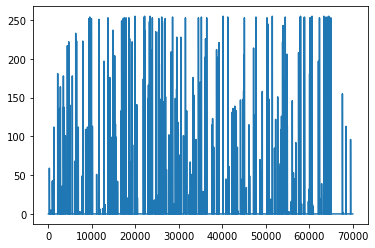

In [15]:
df['pixel255'].plot()

<AxesSubplot:xlabel='pixel255', ylabel='class'>

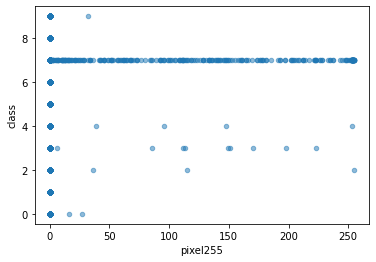

In [16]:
df.plot.scatter(x="pixel255", y="class", alpha=0.5)

<AxesSubplot:>

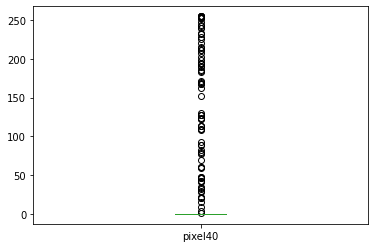

In [17]:
df['pixel40'].plot.box()

array([<AxesSubplot:>], dtype=object)

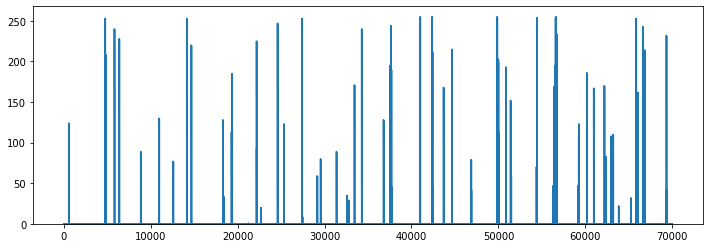

In [18]:
df['pixel40'].plot.area(figsize=(12, 4), subplots=True)

In [19]:
import pandas as pd

path_config_file = "mnist_train.conf"

path_data_in = "data/mnist_784_csv.csv"

path_save_predict = "data/result_predict.csv"

import configparser

config = configparser.ConfigParser()

config.read(path_config_file)

['mnist_train.conf']

In [20]:
from models import naive_model

model = naive_model.NaiveModel()

model.load(config['paths']['path_save_avg_data_train'])

data_mnist = pd.read_csv(path_data_in)

result_predict = model.predict(data_mnist)

result_predict.to_csv(path_save_predict)

In [21]:
#Original data
df['pixel255'].describe()

count    70000.000000
mean         0.509186
std          9.734744
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        255.000000
Name: pixel255, dtype: float64

In [22]:
#Convert data
result_predict['pixel255'].describe()

count    70000.000000
mean         1.050486
std         20.083468
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        526.083112
Name: pixel255, dtype: float64